# Data-Assignment1-Sihle

In [1]:
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

I am undertaking a task of analyzing the data "Full NBA players stats from the 2014-2015 season" as dowloaded from the Kaggle website of datasets.
 
The dataset contains a collection of personal details such as height, weight, etc. together with game details such as field goals made(FGM), field goals attempted(FGA), 3 pointers attempted(3PA), etc. We will try to see if there exists a relationship between a few parameteres(explanatory variables) and the total number of points scored in the season (response variable).

This will be done using a multivariate regression analysis model.
The data is displayed below:

In [3]:
Data = pd.read_csv('players_stats.csv')
Data

Name  Games Played   MIN   PTS  FGM   FGA    FG%  3PM  3PA  \
0             AJ Price            26   324   133   51   137   37.2   15   57   
1         Aaron Brooks            82  1885   954  344   817   42.1  121  313   
2         Aaron Gordon            47   797   243   93   208   44.7   13   48   
3        Adreian Payne            32   740   213   91   220   41.4    1    9   
4           Al Horford            76  2318  1156  519   965   53.8   11   36   
5         Al Jefferson            65  1992  1082  486  1010   48.1    2    5   
6        Alan Anderson            74  1744   545  195   440   44.3   73  210   
7           Alec Burks            27   899   374  121   300   40.3   26   68   
8            Alex Kirk             5    14     4    1     4   25.0    0    0   
9             Alex Len            69  1518   432  179   353   50.7    1    3   
10        Alexey Shved            42   767   434  133   335   39.7   47  139   
11       Alexis Ajinca            68   957   443  181   329   55.0    0    0   
12     Al-Farouq Aminu            74  1366   412  147   357   41.2   34  124   
13        Allen Crabbe            51   683   168   63   153   41.2   30   85   
14          Alonzo Gee            54   661   241   87   186   46.8   13   35   
15   Amar'e Stoudemire            59  1244   680  273   490   55.7    0    4   
16        Amir Johnson            75  1979   694  298   519   57.4   19   46   
17    Anderson Varejao            26   636   255  111   200   55.5    0    2   
18       Andre Dawkins             4    22     3    1     6   16.7    1    6   
19      Andre Drummond            82  2502  1130  494   961   51.4    0    2   
20      Andre Iguodala            77  2069   604  231   496   46.6   74  212   
21        Andre Miller            81  1253   355  145   290   50.0    7   34   
22      Andre Roberson            67  1286   228   92   201   45.8   21   85   
23     Andrea Bargnani            29   785   430  164   361   45.4   15   41   
24    Andrei Kirilenko             7    36     3    0     5    0.0    0    0   
25        Andrew Bogut            67  1583   422  200   355   56.3    0    0   
26    Andrew Nicholson            40   492   194   83   190   43.7   13   41   
27      Andrew Wiggins            82  2969  1387  497  1137   43.7   39  126   
28     Anthony Bennett            57   894   298  125   297   42.1    7   23   
29       Anthony Davis            68  2455  1656  642  1199   53.5    1   12   
..                 ...           ...   ...   ...  ...   ...    ...  ...  ...   
460      Trevor Booker            79  1564   567  226   464   48.7   29   84   
461         Trey Burke            76  2288   973  370  1005   36.8  124  390   
462   Tristan Thompson            82  2194   693  267   488   54.7    0    0   
463       Troy Daniels            47   397   176   61   165   37.0   43  118   
464          Ty Lawson            75  2665  1143  404   926   43.6   70  205   
465        Tyler Ennis            33   411   121   52   144   36.1   12   43   
466   Tyler Hansbrough            74  1058   270   86   165   52.1    1    7   
467      Tyler Johnson            32   603   190   70   167   41.9   18   48   
468       Tyler Zeller            82  1731   833  340   619   54.9    0    0   
469       Tyreke Evans            79  2690  1313  521  1165   44.7   69  227   
470       Tyrus Thomas             2     7     4    1     1  100.0    0    0   
471     Tyson Chandler            75  2286   771  293   440   66.6    0    0   
472      Udonis Haslem            62   995   261  107   239   44.8    2   10   
473        Vander Blue             2    74    22    9    30   30.0    2   10   
474      Victor Claver            10    76    24    9    20   45.0    6   11   
475     Victor Oladipo            72  2573  1292  473  1086   43.6   84  248   
476       Vince Carter            66  1091   384  135   406   33.3   69  232   
477    Wayne Ellington            65  1675   650  254   617   41.2   90  243   
478     Wesley Joh

Before I start with the analysis, I will start by viweing important information such as the mean, standard deviation and the quartiles of each parameter. The summary of the data is shown below: 

In [4]:
Data.describe()

Games Played          MIN          PTS         FGM          FGA  \
count    490.000000   490.000000   490.000000  490.000000   490.000000   
mean      53.014286  1214.714286   502.108163  188.338776   419.526531   
std       24.175437   820.570132   422.084232  156.265752   337.367125   
min        1.000000     3.000000     0.000000    0.000000     0.000000   
25%       33.000000   492.250000   145.250000   55.500000   139.000000   
50%       61.000000  1193.000000   423.000000  156.000000   357.500000   
75%       74.000000  1905.750000   774.000000  286.000000   642.750000   
max       83.000000  2981.000000  2217.000000  659.000000  1471.000000   

              FG%         3PM        3PA         3P%         FTM     ...      \
count  490.000000  490.000000  490.00000  490.000000  490.000000     ...       
mean    43.099184   39.387755  112.52449   25.519184   86.042857     ...       
std      9.625231   47.880909  127.38575   15.796603   91.315316     ...       
min      0.000000    0.000000    0.00000    0.000000    0.000000     ...       
25%     39.600000    1.000000    6.00000   15.500000   18.500000     ...       
50%     42.900000   18.000000   58.00000   31.300000   58.000000     ...       
75%     47.575000   66.000000  192.00000   36.400000  126.750000     ...       
max    100.000000  286.000000  646.00000  100.000000  715.000000     ...       

              BLK         TOV          PF          EFF     AST/TOV  \
count  490.000000  490.000000  490.000000   490.000000  490.000000   
mean    24.075510   68.826531  101.483673   564.330612    1.465837   
std     31.662852   58.480701   65.326807   464.428031    0.825037   
min      0.000000    0.000000    0.000000    -3.000000    0.000000   
25%      5.000000   23.000000   45.500000   165.000000    0.920000   
50%     14.000000   56.500000  103.000000   490.500000    1.345000   
75%     29.750000  100.000000  148.750000   837.000000    1.920000   
max    200.000000  321.000000  285.000000  2202.000000    6.500000   

          STL/TOV         Age      Height      Weight         BMI  
count  490.000000  422.000000  422.000000  422.000000  422.000000  
mean     0.626000   27.507109  197.440758   99.469194   25.427747  
std      0.367443    4.220603    8.740250   12.364228    1.715794  
min      0.000000   20.000000  172.500000   72.450000   20.411523  
25%      0.392500   24.000000  190.000000   90.000000   24.286136  
50%      0.530000   27.000000  197.500000   99.000000   25.420833  
75%      0.820000   30.000000  205.000000  108.000000   26.437500  
max      3.000000   39.000000  222.500000  162.000000   32.723141  

[8 rows x 27 columns]

The explanatory variables I am interested in are, Age, Weight and Games played. My objective is to see if an older person(Age) with more weigh, who has played a certain number of games, has a relation with the total score of points for the season (response variable) .

Since the Age and Weight parameters have some missing values in the dataset, I will impute missing data with a replacement value. I choose my replacement value to be the mean of the parameter, because since we are dealing with Age and Weight, I assume that all the Basketball playes are in the same age and weight range.

In [7]:
import math


Age=Data['Age']
for j in range(len (Age)):
    if math.isnan(Age[j]):
        Age[j]=27.507109

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
import math


Weight=Data['Weight']
for j in range(len (Weight)):
    if math.isnan(Weight[j]):
        Weight[j]=99.469194

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Now I partition my explanatory variables into three.
First I will run linear regression models to see if each explanatory variable has a linear relationship with my response variable(points of the season) individually. Then later, I will run a multivariate regression model to check if my predictors collectively have a strong relationship with me expected value.

In [9]:
x = Data['Games Played']
w = Data["Weight"]
y = Data['PTS']
z = Data['Age']
x1 = x.reshape(-1,1)
x2 = z.reshape(-1,1)
x3 = w.reshape(-1,1)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [34]:
#del Data["Weight"]

In [35]:
#Data["Weight"]=subset

###### The first model is for predictor "Games Played" 

In [10]:
regr = linear_model.LinearRegression()
regr.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x1) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x1,y))


Coefficients: 
 [ 12.7098448]
Mean squared error: 83571.77
Variance score: 0.53


The regression coeeficient for this model is:12.71 ,meaning - for every game played, the points scored in the season should increase by approximatelt 13 points, which appears to be possible from the graph below.

The variance score is: 0.53 which is far from 1, this tells us that the linear relationship is not strong.

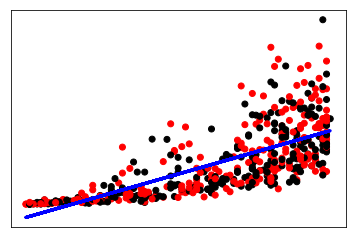

In [12]:
# Plot outputs
plt.scatter(x1, y,  color=['black','red'])
plt.plot(x1, regr.predict(x1), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

###### The second model is for predictor "Age"

Coefficients: 
 [ 12.7098448]
Mean squared error: 282872.28
Variance score: -0.59


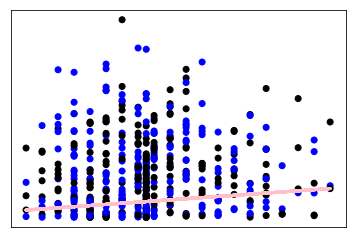

In [14]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x2) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x2,y))
# Plot outputs
plt.scatter(x2, y,  color=['black','blue'])
plt.plot(x2, regr.predict(x2), color='pink',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

The regression coeeficient for this model is:12.71, meaning - for every year added, the points scored in the season should increase by approximatelt 13 points

The variance score is: -0.59 - the varaince should be close to one if there exists a linear relationship between our 2 variables. -0.59 tells us that there is no relationship whatsoever.

###### The third model is for predictor "Weight"

Coefficients: 
 [ 12.7098448]
Mean squared error: 544073.56
Variance score: -2.06


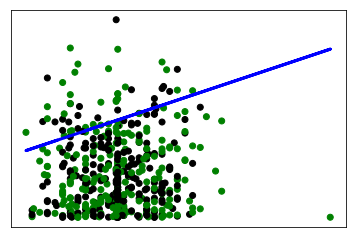

In [16]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x3) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x3,y))
# Plot outputs
plt.scatter(x3, y,  color=['black','green'])
plt.plot(x3, regr.predict(x3), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

The regression coeeficient for this model is:12.71, meaning - for every unit of weight added, the points scored in the season should increase by approximatelt 13 points. 

The variance score is: -2.06 which tells that that there is no linear relationship between the 2 varaibles. The relationship is strong when the variance score is 1 or close to 1.

In [17]:
xvar=Data[["Games Played","Age","Weight"]]
xvar.head(2)
v=xvar.values
x4 = v.reshape(-1,1)

Based on our previous linear regression models of our 3 explanatory variables, it is almost obvious that out multilinear regression model will not be strong. Let us explore this next by evaluating a model incorporating all 3 variables to see if we can fit a model to our response variable.

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x1,x2,x3) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x1,x2,x3,y))
# Plot outputs
#plt.scatter(x4, y,  color='black')
#plt.plot(x4, regr.predict(x4), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())
#plt.show()

Coefficients: 
 [ 12.7098448]


TypeError: predict() takes 2 positional arguments but 4 were given

The regression coeeficient for this model is:
The variance score is:

In [47]:
import pandas as pd
from sklearn import linear_model
Data1 = pd.read_csv("players_stats.csv")
Data2 = pd.read_csv("players_stats.csv")
#print df.head()

In [48]:
import math


Age=Data1['Age']
for j in range(len (Age)):
    if math.isnan(Age[j]):
        Age[j]=27.507109

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [49]:
import math


Weight=Data1['Weight']
for j in range(len (Weight)):
    if math.isnan(Weight[j]):
        Weight[j]=99.46919

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [50]:
a_train = Data1[['Age', 'Weight','Games Played']]
b_train = Data1['PTS']

a_test = Data2[['Age', 'Weight','Games Played']]
b_test = Data2['PTS']

In [51]:
ols = linear_model.LinearRegression()
model = ols.fit(a_train, b_train)

print model.predict(a_test)[0:5]


SyntaxError: invalid syntax (<ipython-input-51-5c1a7e8127b8>, line 4)

In [52]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(a_train, b_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(a_test) - b_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(b_test))

Coefficients: 
 [ -3.57693153  -0.82755624  12.81369537]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

From the multivariate regression model, our coefficients are as follows

Games Played x1 = -3.5769

Age x2 =-0.8276

Weight x3 = 12.813

This tells us that we cannot establish a relationship between the 3 explanatory variables and or response variable.

## Conclusion

We have seen that a regression analysis method of analyzing this data was not feasible. There are many other ways to analyse and intepret data, perhaps clustering or other statistical models.
The regression model was not applicable most probably because some assumptions were not met.
We can conclude by saying, the age, weight and number of games played, cannot determine how many points a person will score in a season of Basketball